### Логистическая регрессия

1. Загрузите данные `load_wine` из `sklearn.datasets`. Из данных исключите объекты класса 2.
 Отмасштабируйте признаки, используя класс `StandardScaler` с гиперпараметрами по умолчанию. Обучите логистическую регрессию и оцените важность признаков. Укажите название признака, который оказался наименее значимым.

In [1]:
feature_1 = "имя признака, который оказался наименее значимым"

# your code here

from sklearn.datasets import load_wine

data = load_wine()

data


{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [2]:
import numpy as np

X = data.data
y = data.target

X = np.delete(X, np.where(y[:] == 2), 0)
y = np.delete(y, np.where(y[:] == 2), 0)

y.shape

(130,)

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

X

array([[ 1.452455  , -0.29441432,  0.30247764, ..., -0.11242761,
         2.04002469,  0.782868  ],
       [ 0.28906609, -0.21455828, -0.67719651, ..., -0.05291788,
         0.94143735,  0.74015178],
       [ 0.24388594,  0.4471061 ,  1.11324246, ..., -0.17193734,
         0.45552372,  1.12459784],
       ...,
       [-1.30353427,  0.18472195,  1.484843  , ..., -0.52899571,
        -1.0867239 , -0.92293343],
       [-0.64842207, -0.38567837, -0.13668663, ..., -1.00507355,
        -0.36841679, -1.27605426],
       [-1.02115832,  2.66025935,  0.13356831, ..., -1.60017084,
        -0.81207706, -0.59829008]])

In [4]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X, y)

logreg.coef_

array([[-1.54159556, -0.49400041, -0.97150156,  1.23984657, -0.23754033,
        -0.03352988, -0.33050451,  0.17508679,  0.18676656, -0.79642193,
         0.15133522, -0.62736253, -1.81341988]])

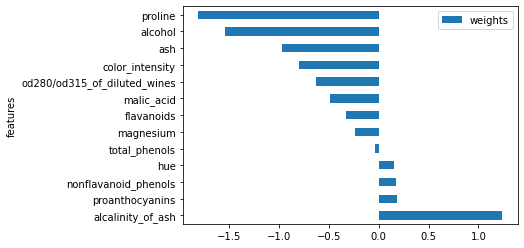

In [5]:
import pandas as pd

sorted_weights = sorted(zip(logreg.coef_.ravel(), data.feature_names), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
df = pd.DataFrame({'features': features, 'weights': weights})
ax = df.plot.barh(x='features', y='weights', rot=0, )

In [6]:
sorted_weights_abs = sorted(zip(list(map(abs, logreg.coef_.ravel())), data.feature_names))

feature_1 = sorted_weights_abs[0][1]

feature_1

'total_phenols'

In [7]:
# проверка, просто запустите ячейку


Обратите внимание, целевое значение лежит по ключу `'target'`, матрица объекты-признаки лежит по ключу `'data'`



In [8]:
from sklearn.datasets import load_wine
data = load_wine()
print(data)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

2. Загрузите данные `load_wine` из `sklearn.datasets`. Из обучающей части исключите объекты соответствующие классу 2. Не масштабируйте признаки. Обучите логистическую регрессию с гиперпараметрами по умолчанию.
Выберите признак из предложенных, которому соответствует минимальный вес. 


In [9]:
# feature_2 = "имя признака, которому соответствует минимальный веc" ...

# your code here

X = data.data
y = data.target

X = np.delete(X, np.where(y[:] == 2), 0)
y = np.delete(y, np.where(y[:] == 2), 0)

y.shape


(130,)

In [10]:
logreg = LogisticRegression()
logreg.fit(X, y)

logreg.coef_

array([[ 0.81956669, -1.00715613, -0.99301494,  0.49568092,  0.01957306,
         0.06832599, -0.70481557, -0.0584593 ,  0.48249233, -0.7998048 ,
         0.34179214, -0.64511744, -0.01642519]])

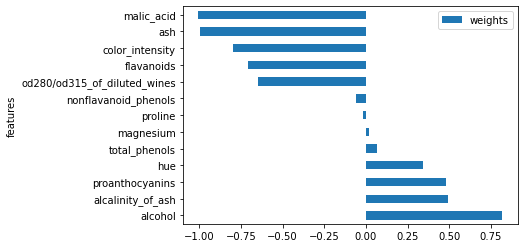

In [11]:
sorted_weights = sorted(zip(logreg.coef_.ravel(), data.feature_names), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
df = pd.DataFrame({'features': features, 'weights': weights})
ax = df.plot.barh(x='features', y='weights', rot=0, )

In [12]:
sorted_weights_abs = sorted(zip(list(map(abs, logreg.coef_.ravel())), data.feature_names))

feature_2 = sorted_weights_abs[0][1]

feature_2

'proline'

In [13]:
# проверка, просто запустите ячейку


3. Решается задача бинарной классификации. Дана матрица объекты признаки 𝑋 и ответы для объектов  𝑦. Обучите логистическую регрессию и предскажите класс объекта x_new

In [14]:
X = np.array([[1, 1], [0.3, 0.7], [0, 4], [-2, -7], [0, -2], [-1, -1], [-2, 0]])
y = np.array([1, 1, 1, 0, 0, 0, 0])
x_new = np.array([[-5, 1]])

In [15]:
# x_new_class = ...

# your code here

logreg = LogisticRegression()
logreg.fit(X, y)

x_new_class = logreg.predict(x_new)[0]

x_new_class


0

In [16]:
# проверка, просто запустите ячейку


### Классификация текстов

4. Рассмотрим данные SMSSpamCollection из UCI (https://archive.ics.uci.edu/ml/machine-learning-databases/00228/). Данные содержат текстовую информацию и бинарное целевое значение (‘spam’, ‘ham’), Пусть в обучающую часть попадут первые 4000 объектов из таблицы, в тестовую часть оставшиеся объекты. Обучите `TfidfVectorizer` с гиперпараметрами по умолчанию на текстах из обучающей части и получите векторное представление для объектов обучающей и тестовой части. Укажите полученное число признаков.


In [17]:
import pandas as pd
data = pd.read_csv('spam_collection.csv')
data.head()

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5572 non-null   object
 1   text      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [19]:
X = data.text
y = data.category

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tf_idf = TfidfVectorizer()

In [21]:
X_train, y_train = X[:4000], y[:4000]
X_test, y_test = X[4000:], y[4000:]

In [22]:
vectorizer_tf_idf.fit(X_train)

train_bow = vectorizer_tf_idf.transform(X_train)
test_bow = vectorizer_tf_idf.transform(X_test)

In [23]:
num_features_1 = train_bow.shape[1]

num_features_1

# your code here


7331

In [24]:
# проверка, просто запустите ячейку


5.  Рассмотрим данные SMSSpamCollection из UCI (https://archive.ics.uci.edu/ml/machine-learning-databases/00228/). Данные содержат текстовую информацию и бинарное целевое значение (‘spam’, ‘ham’), Пусть в обучающую часть попадут первые 4000 объектов из таблицы, в тестовую часть оставшиеся объекты. Обучите `TfidfVectorizer`, помимо слов входящих в тексты, учитывайте биграммы (используйте гиперпараметр `ngram_range`). Укажите полученное число признаков.

In [25]:
vectorizer_tf_idf_ngram = TfidfVectorizer(ngram_range=(1, 2))

vectorizer_tf_idf_ngram.fit(X_train)

train_bow_ngram = vectorizer_tf_idf_ngram.transform(X_train)
test_bow_ngram = vectorizer_tf_idf_ngram.transform(X_test)

In [26]:
num_features_2 = train_bow_ngram.shape[1]

num_features_2

# your code here


39805

In [27]:
# проверка, просто запустите ячейку


6. Рассмотрим данные SMSSpamCollection из UCI (https://archive.ics.uci.edu/ml/machine-learning-databases/00228/). Данные содержат текстовую информацию и бинарное целевое значение (‘spam’, ‘ham’), Пусть в обучающую часть попадут первые 4000 объектов из таблицы, в тестовую часть оставшиеся объекты. Обучите `TfidfVectorizer`, не учитывайте слова, которые встретились меньше 2 раз в обучающей выборке (используйте гиперпараметр `min_df`). Укажите полученное число признаков.

In [28]:
vectorizer_tf_idf_mindf = TfidfVectorizer(min_df=2)

vectorizer_tf_idf_mindf.fit(X_train)

train_bow_mindf = vectorizer_tf_idf_mindf.transform(X_train)
test_bow_mindf = vectorizer_tf_idf_mindf.transform(X_test)

In [29]:
num_features_3 = train_bow_mindf.shape[1]

num_features_3

# your code here


3377

In [30]:
# проверка, просто запустите ячейку


7. Рассмотрим данные SMSSpamCollection из UCI (https://archive.ics.uci.edu/ml/machine-learning-databases/00228/). Данные содержат текстовую информацию и бинарное целевое значение (‘spam’, ‘ham’), Пусть в обучающую часть попадут первые 4000 объектов из таблицы, в тестовую часть оставшиеся объекты. Обучите `TfidfVectorizer` с гиперпараметрами по умолчанию на текстах из обучающей части и получите векторное представление для объектов обучающей и тестовой части. На полученных векторных представлениях обучите логистическую регрессию и оцените долю правильных ответов на тестовой части. Укажите полученное значение доли правильных ответов.

In [31]:
y_train = y_train.map({'spam': 0, 'ham': 1})
y_test = y_test.map({'spam': 0, 'ham': 1})

In [32]:
logreg = LogisticRegression()

logreg.fit(train_bow, y_train)
preds = logreg.predict(test_bow)

preds.shape

(1572,)

In [33]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(preds, y_test)

accuracy
# your code here


0.9694656488549618

In [34]:
# проверка, просто запустите ячейку

